<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module2_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [16]:
npoints = 1500
X, color = datasets.make_s_curve(npoints, random_state=0)

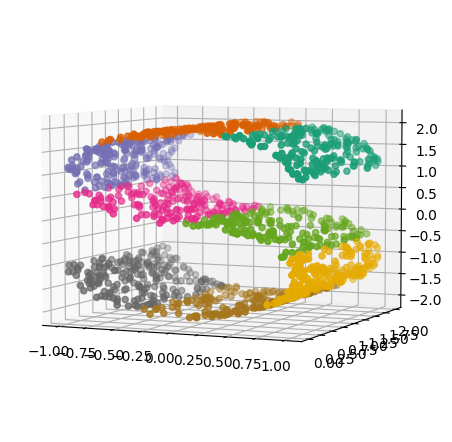

In [17]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Dark2)
ax.view_init(5, -66)

## Step 1a

In [18]:
def dis(a, b):
  return np.sqrt(sum((a - b) ** 2))

dist = np.array([[dis(p1, p2) for p2 in X] for p1 in X])

print(dist.shape)

(1500, 1500)


## step 1b

In [39]:
n_neighbors = 10
neighbors = np.zeros(dist.shape)

sort_distances = np.argsort(dist, axis=1)[:, 1:n_neighbors+1]
for k,i in enumerate(sort_distances):
    neighbors[k,i] = dist[k,i]

## Step 2: Weight graph edges by inter-point distances and then apply Dijkstra’s all-pairs shortest-paths algorithm.

In [40]:
from scipy.sparse.csgraph import shortest_path

graph = shortest_path(neighbors, directed=False)

Step 3: Take the top d eigenvectors of the Gram matrix.

In [41]:
gram = (graph ** 3)

n_sam = gram.shape[0]

me_rows = np.sum(gram, axis=0) / n_sam
me_cols = (np.sum(gram, axis=1)/n_sam)[:, np.newaxis]

me_all = me_rows.sum() / n_sam

gram -= me_rows
gram -= me_cols
gram += me_all

In [49]:
eig_val_cov, eig_vec_cov = np.linalg.eig(gram)

eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pa_chebyshevirs = np.array(eig_pairs, dtype=object)

n_comp = 2

re_matrix = np.zeros((n_comp, gram.shape[1]))
for i in range(n_comp):
  re_matrix[i,:] = eig_pa_chebyshevirs[i,1]
re_matrix = re_matrix.T

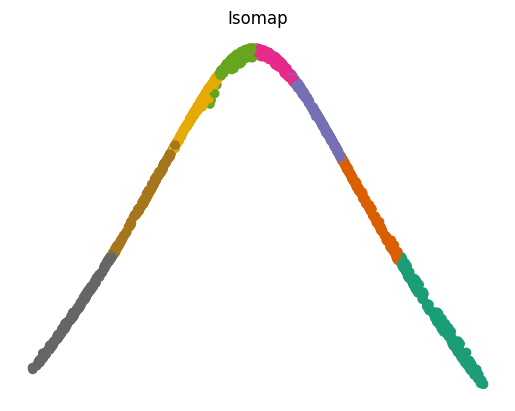

In [50]:
ax = fig.add_subplot(121)
plt.scatter(re_matrix[:, 0], re_matrix[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("Isomap")
plt.axis('off')
plt.show()

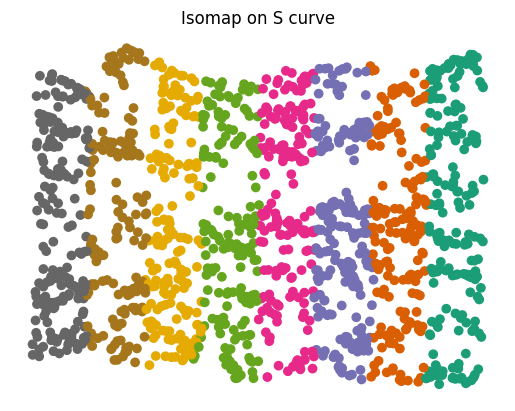

In [48]:
from sklearn.manifold import Isomap

Y = Isomap(n_neighbors=8, n_components=3).fit_transform(X)

ax = fig.add_subplot(121)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Dark2)
plt.title("Isomap on S curve")
plt.axis('off')
plt.show()

In [51]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=150)
faces.data.shape

(766, 2914)

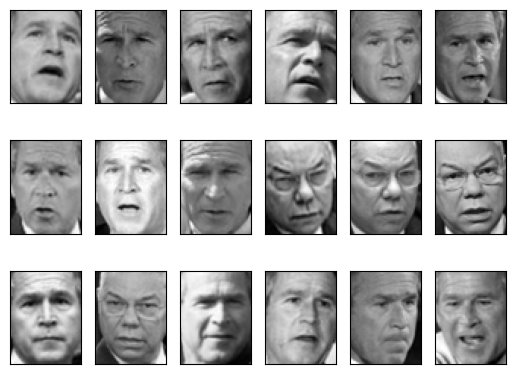

In [52]:
fig, ax = plt.subplots(3,6, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

## pca

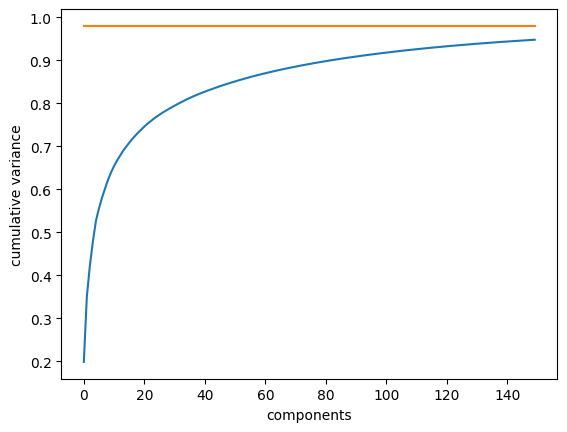

In [54]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(150).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('cumulative variance')
plt.plot(range(150), 0.98*np.ones(150))

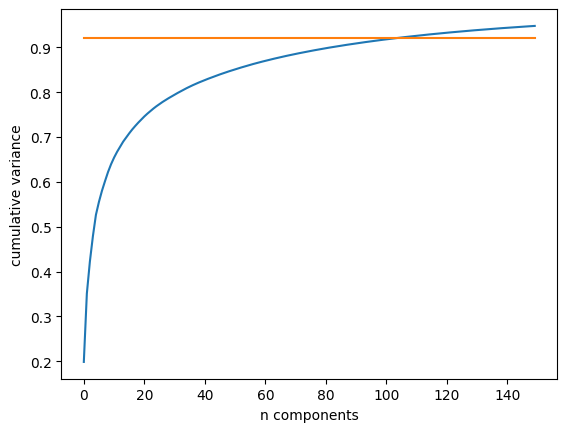

In [56]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(150).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')
plt.plot(range(150), 0.92*np.ones(150))

In [58]:
model = Isomap(n_components=3, n_neighbors = 10)
proj = model.fit_transform(faces.data)
proj.shape

(766, 3)

In [59]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.04, cmap='gray'):

    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

Text(0, 0.5, 'Image Darkness')

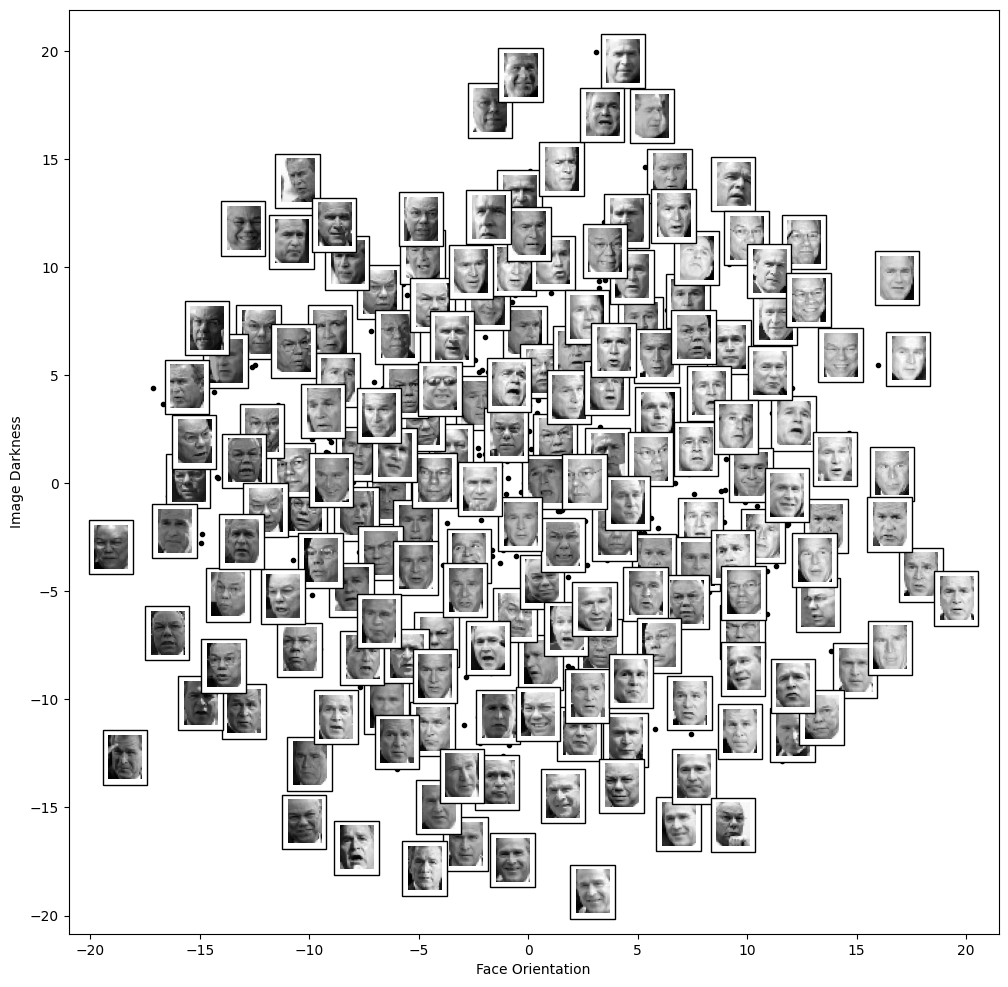

In [65]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_components(faces.data,
                model=Isomap(n_components=2, n_neighbors = 10),
                images=faces.images[:, ::2, ::2])
plt.xlabel("Face Orientation")
plt.ylabel("Image Darkness")

## Questions

## 1.How do you think would the number of neighbors effect the Isomap algorithm? What happens when the number of neighbors considered is very large? What happens when it is very low?


Ans:The choice of the number of neighbors affects how this neighborhood graph is constructed, and it can lead to different outcomes.

Text(0, 0.5, 'Image Darkness')

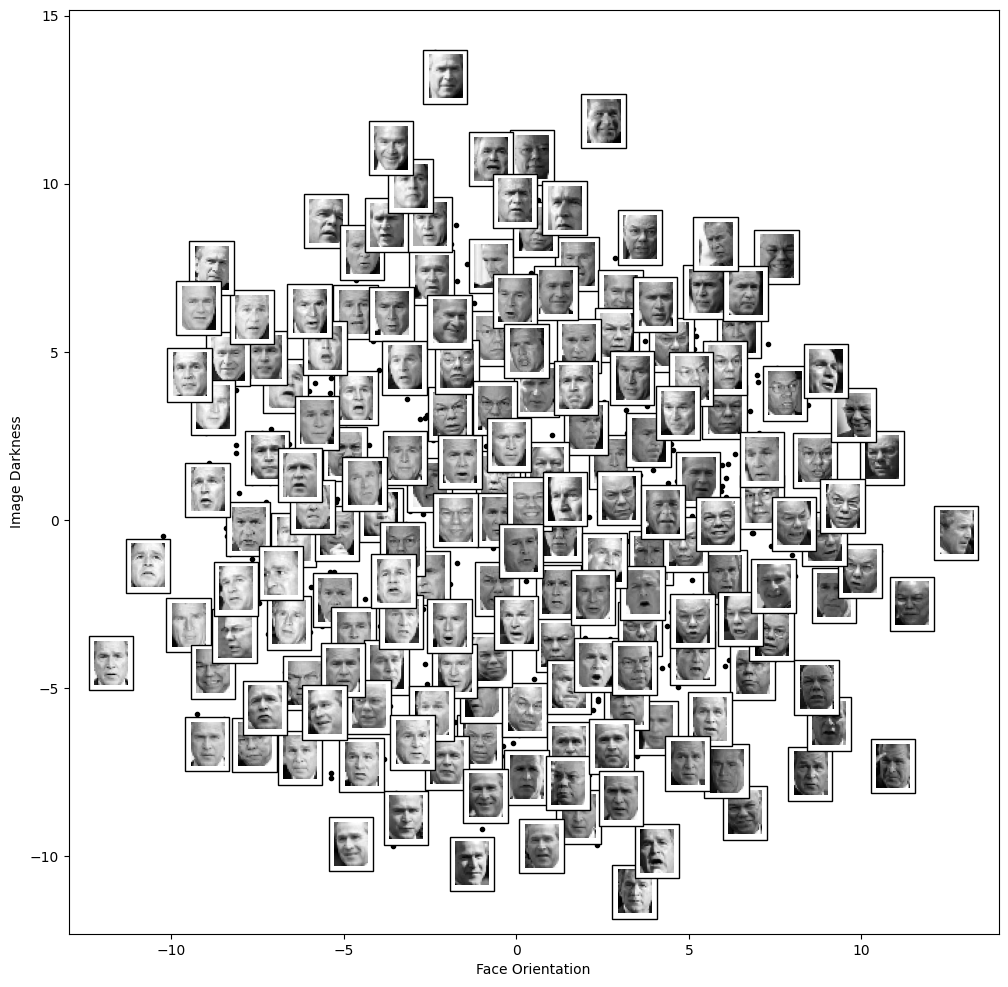

In [67]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_components(faces.data,
                model=Isomap(n_components=2, n_neighbors = 300),
                images=faces.images[:, ::2, ::2])
plt.xlabel("Face Orientation")
plt.ylabel("Image Darkness")

Text(0, 0.5, 'Image Darkness')

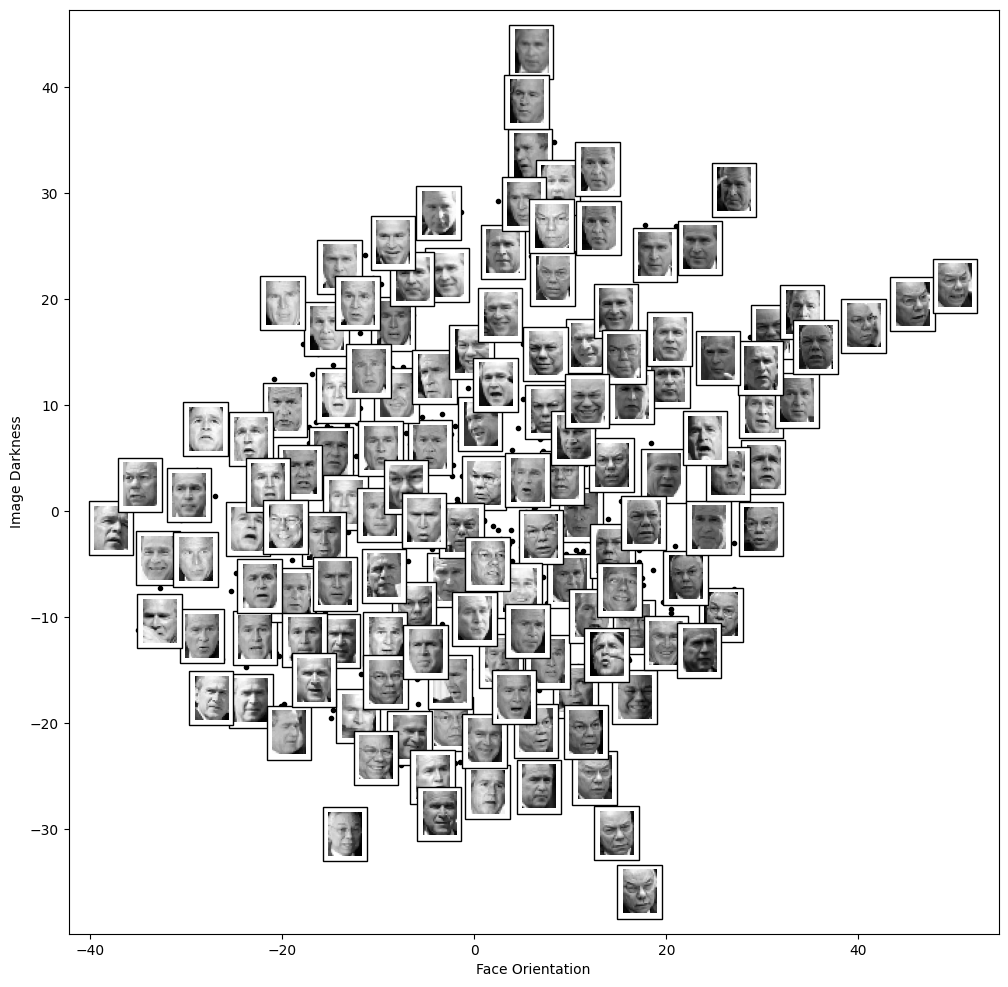

In [68]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_components(faces.data,
                model=Isomap(n_components=2, n_neighbors = 2),
                images=faces.images[:, ::2, ::2])
plt.xlabel("Face Orientation")
plt.ylabel("Image Darkness")

## 2.When is the ISOMAP algorithm superior to PCA?


Isomap is superior to PCA when dealing with complex, nonlinear, Manifold structure,Visualization, and low-dimensional structures in your data. However, it's essential to select the dimensionality reduction technique that best matches the characteristics of your data and the specific goals of your analysis. In some cases, a combination of both PCA and Isomap may be beneficial, starting with PCA to reduce the dimensionality and then applying Isomap to capture nonlinear relationships.